In [1]:
from scipy.io import loadmat

# Load the MAT file
data_path = 'MetaData/dataProScaled.mat'
data = loadmat(data_path)

# Explore the keys and structure of the loaded data
data_keys = list(data.keys())
data_structure = {key: type(data[key]) for key in data_keys}

# Provide the keys and their data types to understand the structure
data_keys, data_structure

(['__header__',
  '__version__',
  '__globals__',
  'dff_filtered',
  'green_idx',
  'positions',
  'red_idx'],
 {'__header__': bytes,
  '__version__': str,
  '__globals__': list,
  'dff_filtered': numpy.ndarray,
  'green_idx': numpy.ndarray,
  'positions': numpy.ndarray,
  'red_idx': numpy.ndarray})

In [2]:
dff_filtered=data['dff_filtered']
print(dff_filtered.shape)

(5766, 6700)


In [3]:
dff_filtered_filters=data['dff_filtered']

## Filtering test

### Bandpass

In [1]:
import numpy as np
from scipy.signal import butter, filtfilt

def apply_butterworth_bandpass_filter(data, lowcut, highcut, fs, order=3):
   
    # Design the Butterworth bandpass filter
    nyq = 0.5 * fs  # Nyquist Frequency
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')

    # Apply the filter to each row (time series) in the data array
    filtered_data = np.zeros_like(data)
    for i in range(data.shape[0]):
        filtered_data[i] = filtfilt(b, a, data[i])
    return filtered_data


In [2]:
dff_filtered_bandpass=apply_butterworth_bandpass_filter(dff_filtered_filters,1,5,160)

NameError: name 'dff_filtered_filters' is not defined

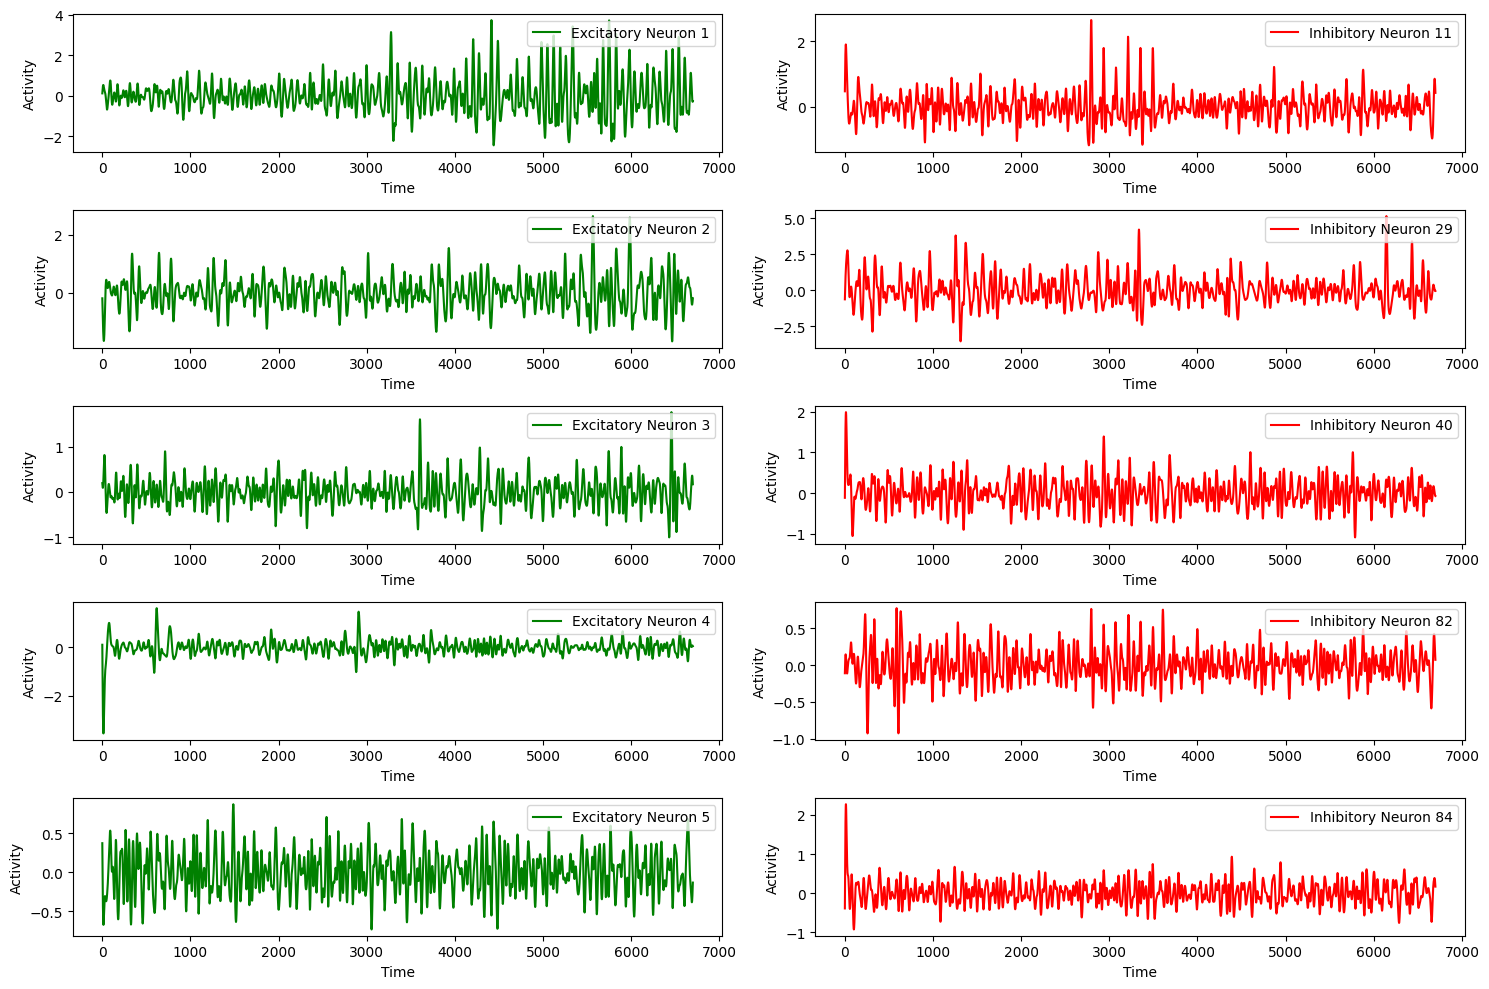

In [6]:
import matplotlib.pyplot as plt


# Extract indices for green and red neurons
green_idx = data['green_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary
red_idx = data['red_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary

# Explicitly select the first 5 indices for excitatory (green) and inhibitory (red) neurons
selected_green_idx = green_idx[:5]  # Selecting first 5 excitatory neurons
selected_red_idx = red_idx[:5]  # Selecting first 5 inhibitory neurons

# Extract time series data for the selected neurons
selected_green_data = dff_filtered_bandpass[selected_green_idx, :]
selected_red_data = dff_filtered_bandpass[selected_red_idx, :]

# Plotting
plt.figure(figsize=(15, 10))

# Plot excitatory neurons
for i, idx in enumerate(selected_green_idx, start=1):
    plt.subplot(5, 2, i*2-1)  # Positioning plots in a 5x2 grid
    plt.plot(selected_green_data[i-1, :], label=f'Excitatory Neuron {idx+1}',color="green")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')
    

# Plot inhibitory neurons
for i, idx in enumerate(selected_red_idx, start=1):
    plt.subplot(5 ,2, i*2)  # Positioning plots in a 5x2 grid
    plt.plot(selected_red_data[i-1, :], label=f'Inhibitory Neuron {idx+1}', color="red")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')

plt.tight_layout()
plt.show()


### Guassian

In [109]:
import numpy as np
from scipy.ndimage import gaussian_filter1d

def apply_gaussian_filter(data, sigma):
  
    filtered_data = np.zeros_like(data)
    for i in range(data.shape[0]):
        filtered_data[i] = gaussian_filter1d(data[i], sigma=sigma)
    return filtered_data


In [110]:
dff_filtered_guass=apply_gaussian_filter(dff_filtered_filters,4)

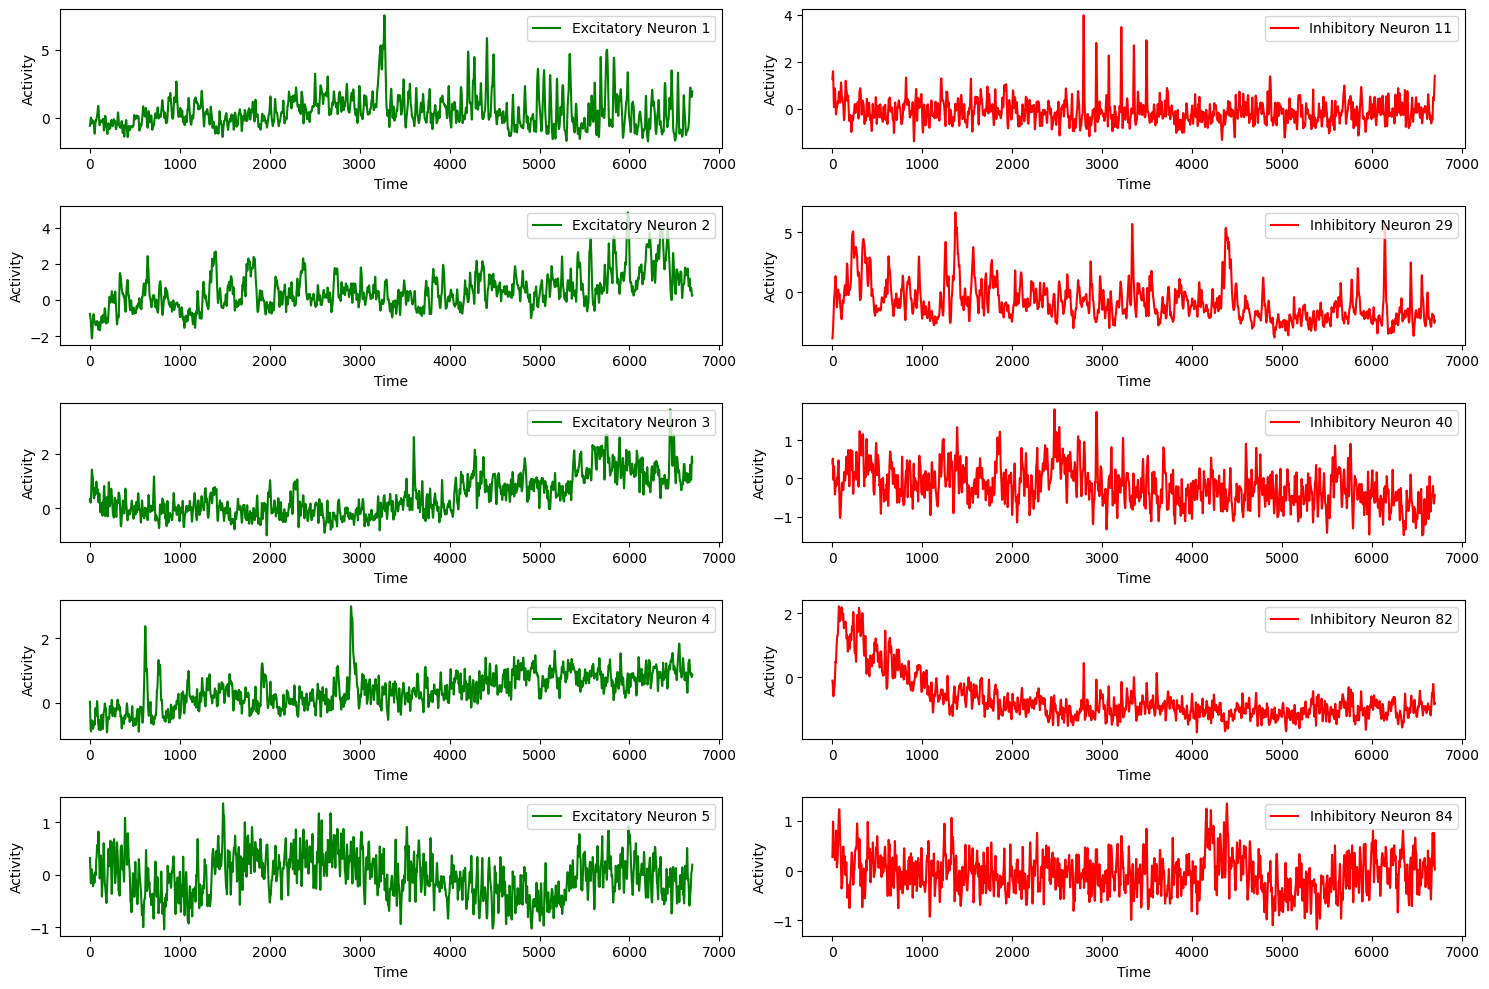

In [46]:
import matplotlib.pyplot as plt


# Extract indices for green and red neurons
green_idx = data['green_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary
red_idx = data['red_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary

# Explicitly select the first 5 indices for excitatory (green) and inhibitory (red) neurons
selected_green_idx = green_idx[:5]  # Selecting first 5 excitatory neurons
selected_red_idx = red_idx[:5]  # Selecting first 5 inhibitory neurons

# Extract time series data for the selected neurons
selected_green_data = dff_filtered_guass[selected_green_idx, :]
selected_red_data = dff_filtered_guass[selected_red_idx, :]

# Plotting
plt.figure(figsize=(15, 10))

# Plot excitatory neurons
for i, idx in enumerate(selected_green_idx, start=1):
    plt.subplot(5, 2, i*2-1)  # Positioning plots in a 5x2 grid
    plt.plot(selected_green_data[i-1, :], label=f'Excitatory Neuron {idx+1}',color="green")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')
    

# Plot inhibitory neurons
for i, idx in enumerate(selected_red_idx, start=1):
    plt.subplot(5 ,2, i*2)  # Positioning plots in a 5x2 grid
    plt.plot(selected_red_data[i-1, :], label=f'Inhibitory Neuron {idx+1}', color="red")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')

plt.tight_layout()
plt.show()




### TV

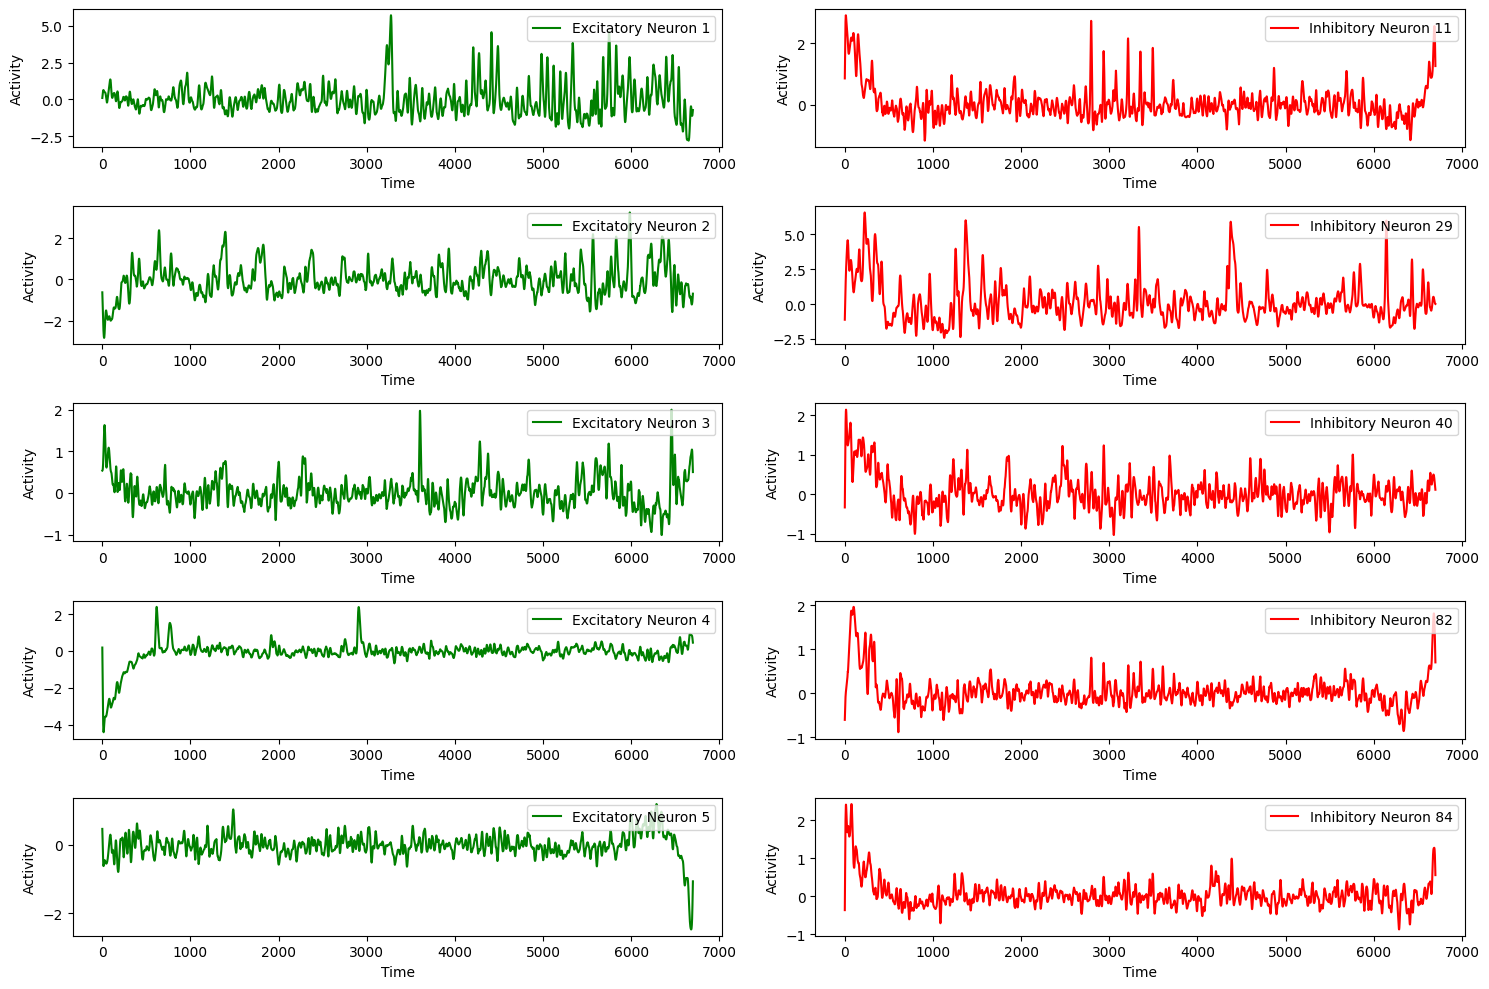

In [7]:
import matplotlib.pyplot as plt


# Extract indices for green and red neurons
green_idx = data['green_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary
red_idx = data['red_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary

# Explicitly select the first 5 indices for excitatory (green) and inhibitory (red) neurons
selected_green_idx = green_idx[:5]  # Selecting first 5 excitatory neurons
selected_red_idx = red_idx[:5]  # Selecting first 5 inhibitory neurons

# Extract time series data for the selected neurons
selected_green_data = tv_denoised_data[selected_green_idx, :]
selected_red_data = tv_denoised_data[selected_red_idx, :]

# Plotting
plt.figure(figsize=(15, 10))

# Plot excitatory neurons
for i, idx in enumerate(selected_green_idx, start=1):
    plt.subplot(5, 2, i*2-1)  # Positioning plots in a 5x2 grid
    plt.plot(selected_green_data[i-1, :], label=f'Excitatory Neuron {idx+1}',color="green")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')
    

# Plot inhibitory neurons
for i, idx in enumerate(selected_red_idx, start=1):
    plt.subplot(5 ,2, i*2)  # Positioning plots in a 5x2 grid
    plt.plot(selected_red_data[i-1, :], label=f'Inhibitory Neuron {idx+1}', color="red")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')

plt.tight_layout()
plt.show()


### Wavelet 

In [7]:
import pywt
import numpy as np

def apply_wavelet_denoising(data, wavelet_name='db1', mode='soft', level=None):
   
    denoised_data = np.zeros_like(data)
    for i in range(data.shape[0]):
        # Compute the wavelet decomposition
        coeffs = pywt.wavedec(data[i], wavelet_name, level=level)
        
        # Threshold the wavelet coefficients
        coeffs_thresholded = [pywt.threshold(c, value=np.median(np.abs(c - np.median(c))) / 0.6745, mode=mode) if j != 0 else c for j, c in enumerate(coeffs)]
        
        # Reconstruct the signal using the thresholded coefficients
        denoised_data[i] = pywt.waverec(coeffs_thresholded, wavelet_name)
        
    return denoised_data


In [8]:
dff_filtered_wave=apply_wavelet_denoising(dff_filtered_bandpass)

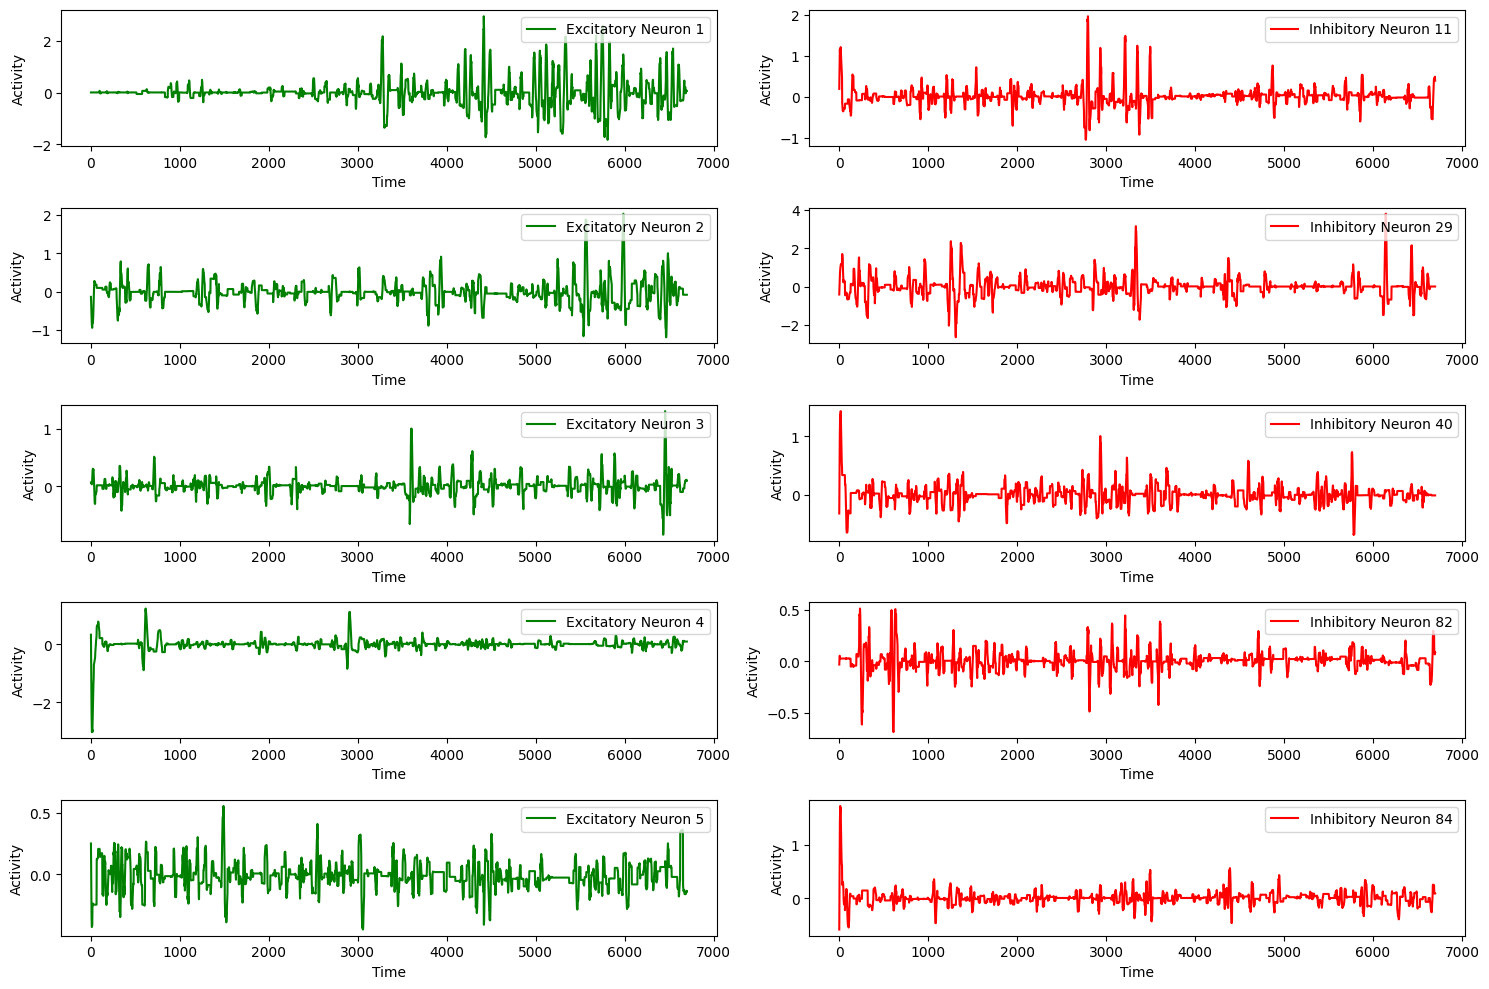

In [9]:
import matplotlib.pyplot as plt


# Extract indices for green and red neurons
green_idx = data['green_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary
red_idx = data['red_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary

# Explicitly select the first 5 indices for excitatory (green) and inhibitory (red) neurons
selected_green_idx = green_idx[:5]  # Selecting first 5 excitatory neurons
selected_red_idx = red_idx[:5]  # Selecting first 5 inhibitory neurons

# Extract time series data for the selected neurons
selected_green_data = dff_filtered_wave[selected_green_idx, :]
selected_red_data = dff_filtered_wave[selected_red_idx, :]

# Plotting
plt.figure(figsize=(15, 10))

# Plot excitatory neurons
for i, idx in enumerate(selected_green_idx, start=1):
    plt.subplot(5, 2, i*2-1)  # Positioning plots in a 5x2 grid
    plt.plot(selected_green_data[i-1, :], label=f'Excitatory Neuron {idx+1}',color="green")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')
    

# Plot inhibitory neurons
for i, idx in enumerate(selected_red_idx, start=1):
    plt.subplot(5 ,2, i*2)  # Positioning plots in a 5x2 grid
    plt.plot(selected_red_data[i-1, :], label=f'Inhibitory Neuron {idx+1}', color="red")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')

plt.tight_layout()
plt.show()

### Combination band + gauss

In [68]:
dff_filtere_comb=gaussian_filter1d(dff_filtered_bandpass,4)

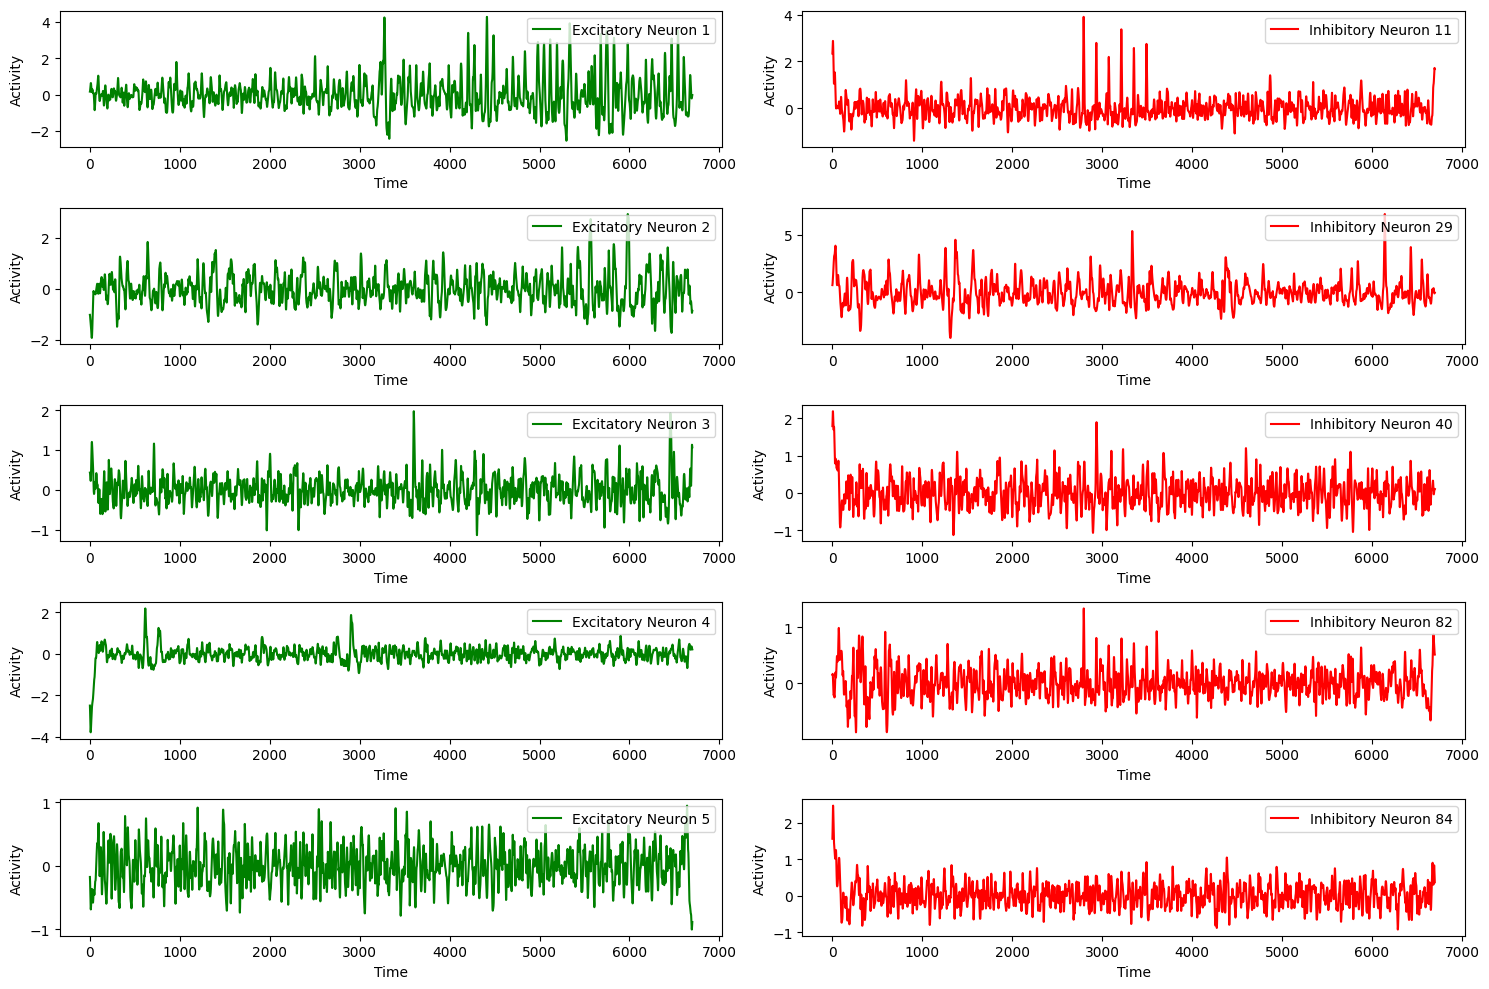

In [69]:
import matplotlib.pyplot as plt


# Extract indices for green and red neurons
green_idx = data['green_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary
red_idx = data['red_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary

# Explicitly select the first 5 indices for excitatory (green) and inhibitory (red) neurons
selected_green_idx = green_idx[:5]  # Selecting first 5 excitatory neurons
selected_red_idx = red_idx[:5]  # Selecting first 5 inhibitory neurons

# Extract time series data for the selected neurons
selected_green_data = dff_filtere_comb[selected_green_idx, :]
selected_red_data = dff_filtere_comb[selected_red_idx, :]

# Plotting
plt.figure(figsize=(15, 10))

# Plot excitatory neurons
for i, idx in enumerate(selected_green_idx, start=1):
    plt.subplot(5, 2, i*2-1)  # Positioning plots in a 5x2 grid
    plt.plot(selected_green_data[i-1, :], label=f'Excitatory Neuron {idx+1}',color="green")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')
    

# Plot inhibitory neurons
for i, idx in enumerate(selected_red_idx, start=1):
    plt.subplot(5 ,2, i*2)  # Positioning plots in a 5x2 grid
    plt.plot(selected_red_data[i-1, :], label=f'Inhibitory Neuron {idx+1}', color="red")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')

plt.tight_layout()
plt.show()


In [66]:
import numpy as np

def detect_spikes(signal, threshold_factor=1):
    mean = np.mean(signal)
    std = np.std(signal)
    threshold = mean + threshold_factor * std
    spikes = signal > threshold
    return spikes

# Assuming `data` is your preprocessed signal
spikes = detect_spikes(dff_filtere_comb)


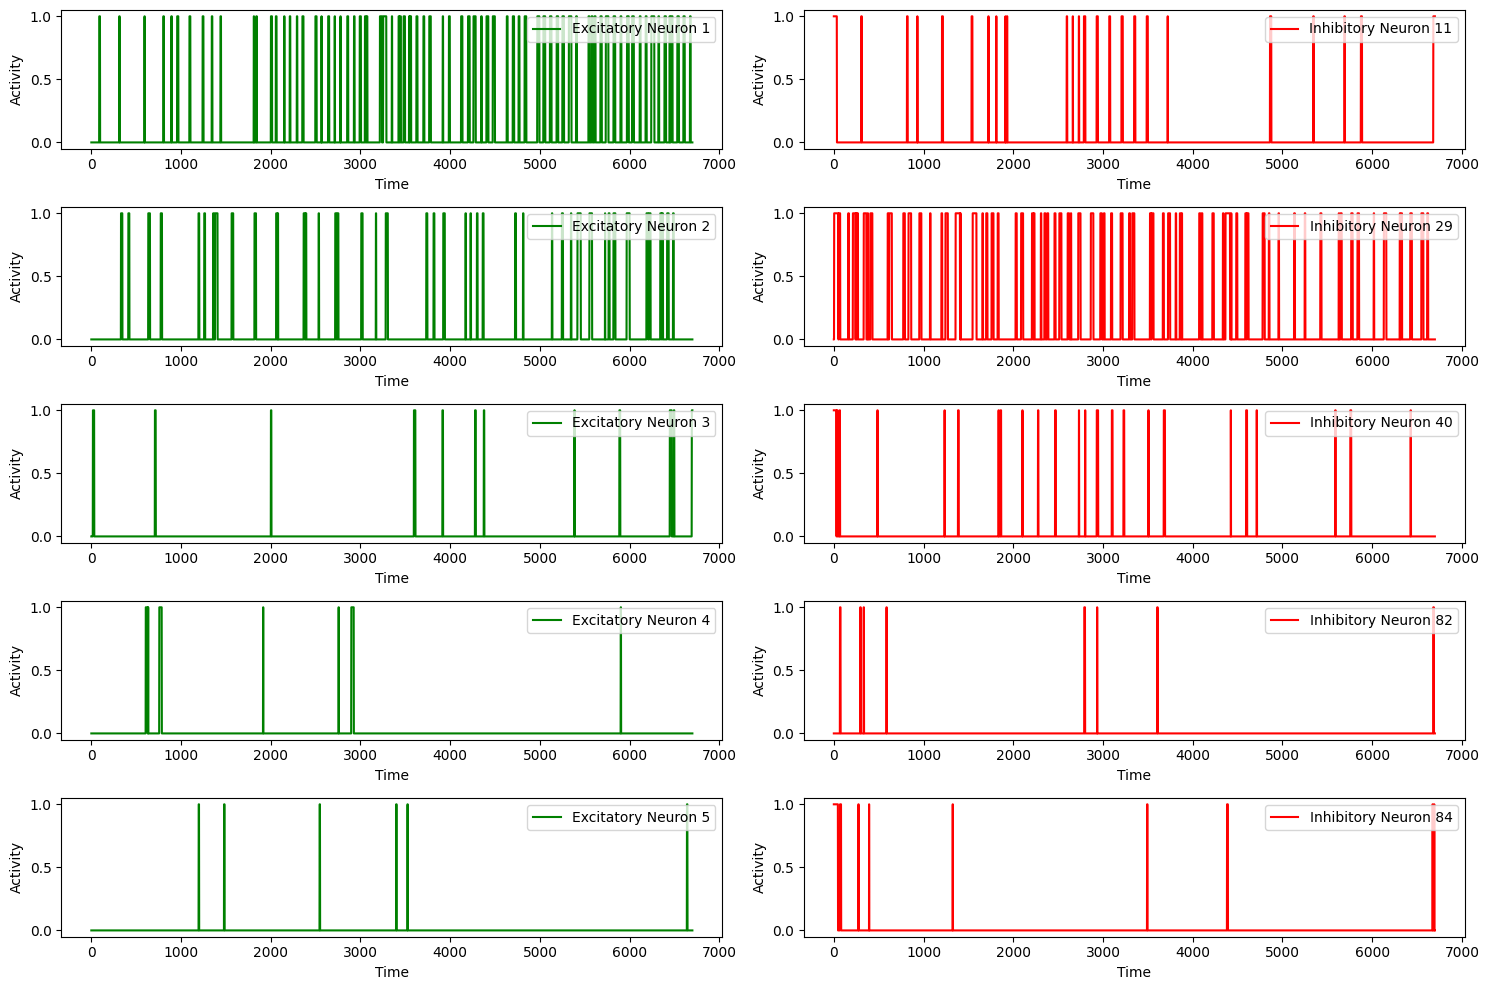

In [67]:
import matplotlib.pyplot as plt


# Extract indices for green and red neurons
green_idx = data['green_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary
red_idx = data['red_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary

# Explicitly select the first 5 indices for excitatory (green) and inhibitory (red) neurons
selected_green_idx = green_idx[:5]  # Selecting first 5 excitatory neurons
selected_red_idx = red_idx[:5]  # Selecting first 5 inhibitory neurons

# Extract time series data for the selected neurons
selected_green_data = spikes[selected_green_idx, :]
selected_red_data = spikes[selected_red_idx, :]

# Plotting
plt.figure(figsize=(15, 10))

# Plot excitatory neurons
for i, idx in enumerate(selected_green_idx, start=1):
    plt.subplot(5, 2, i*2-1)  # Positioning plots in a 5x2 grid
    plt.plot(selected_green_data[i-1, :], label=f'Excitatory Neuron {idx+1}',color="green")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')
    

# Plot inhibitory neurons
for i, idx in enumerate(selected_red_idx, start=1):
    plt.subplot(5 ,2, i*2)  # Positioning plots in a 5x2 grid
    plt.plot(selected_red_data[i-1, :], label=f'Inhibitory Neuron {idx+1}', color="red")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')

plt.tight_layout()
plt.show()


### All 3 combined

In [122]:
dff_filtere_all=gaussian_filter1d(dff_filtered_wave,4)

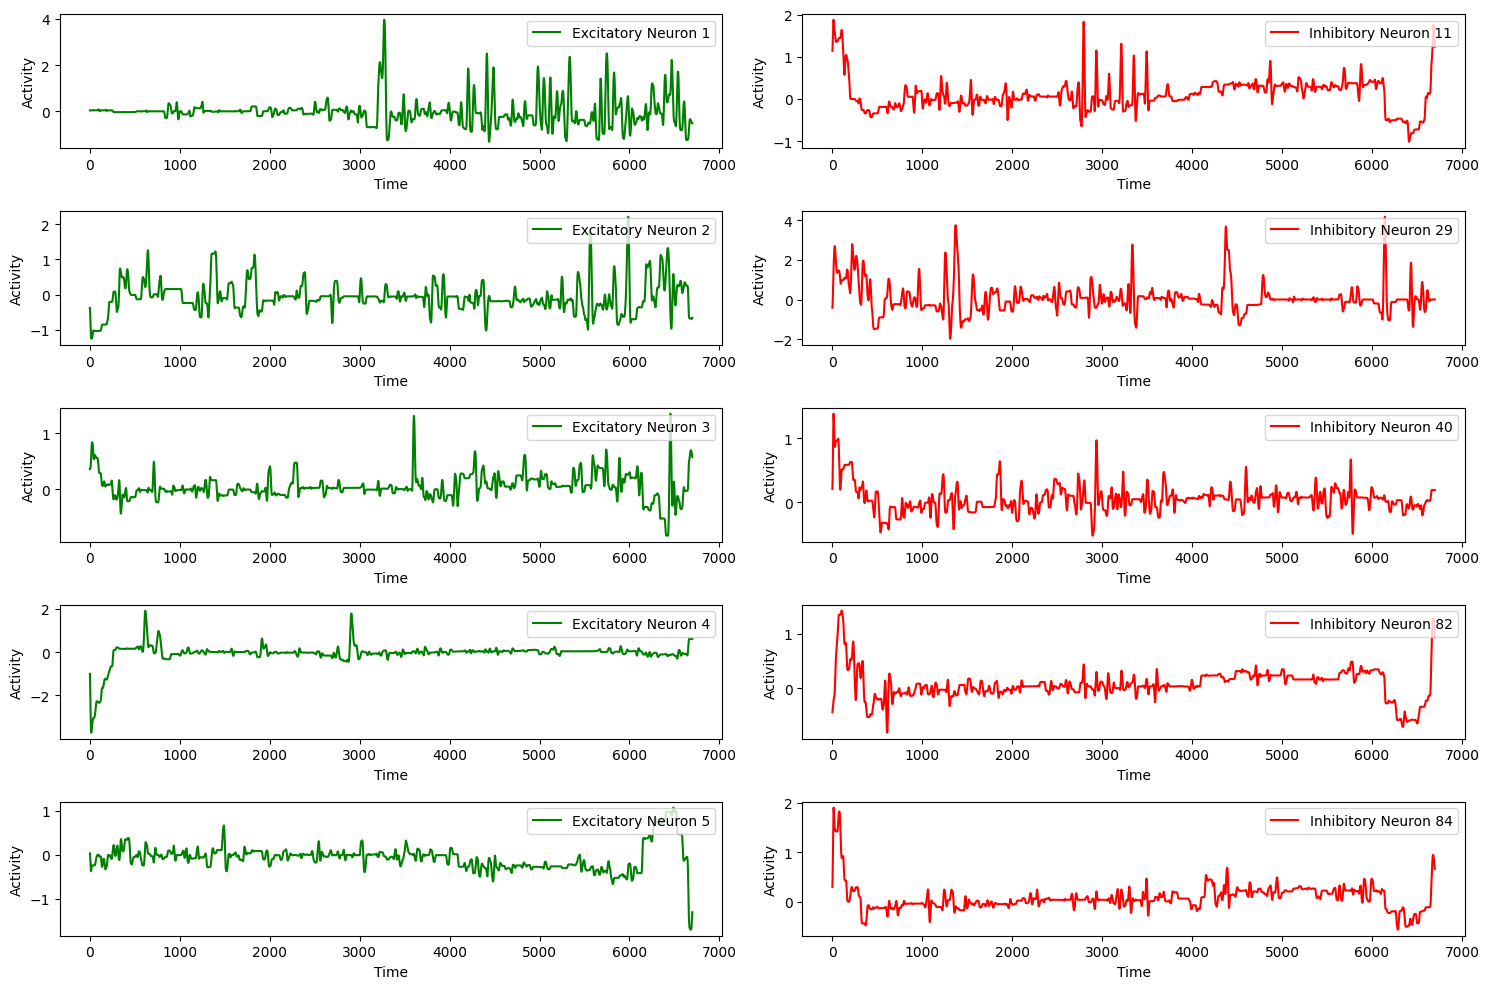

In [123]:
import matplotlib.pyplot as plt


# Extract indices for green and red neurons
green_idx = data['green_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary
red_idx = data['red_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary

# Explicitly select the first 5 indices for excitatory (green) and inhibitory (red) neurons
selected_green_idx = green_idx[:5]  # Selecting first 5 excitatory neurons
selected_red_idx = red_idx[:5]  # Selecting first 5 inhibitory neurons

# Extract time series data for the selected neurons
selected_green_data = dff_filtere_all[selected_green_idx, :]
selected_red_data = dff_filtere_all[selected_red_idx, :]

# Plotting
plt.figure(figsize=(15, 10))

# Plot excitatory neurons
for i, idx in enumerate(selected_green_idx, start=1):
    plt.subplot(5, 2, i*2-1)  # Positioning plots in a 5x2 grid
    plt.plot(selected_green_data[i-1, :], label=f'Excitatory Neuron {idx+1}',color="green")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')
    

# Plot inhibitory neurons
for i, idx in enumerate(selected_red_idx, start=1):
    plt.subplot(5 ,2, i*2)  # Positioning plots in a 5x2 grid
    plt.plot(selected_red_data[i-1, :], label=f'Inhibitory Neuron {idx+1}', color="red")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')

plt.tight_layout()
plt.show()

## Scaler test

In [10]:
import numpy as np
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
import pandas as pd

# Assuming dff_filtered is your data with the shape (5766, 6700)

# Initialize the StandardScaler
scaler = StandardScaler()
norma = Normalizer()
minMa = MinMaxScaler()
# Fit on your data and transform it
#dff_scaled = scaler.fit_transform(dff_filtered)

#dff_scaled_df = pd.DataFrame(dff_scaled)


In [11]:
"""SCALING ON FILTERED DATA"""

dff_scaled_temp= scaler.fit_transform(dff_filtered_wave.T)
dff_scaled=dff_scaled_temp.T

dff_scaled_df = pd.DataFrame(dff_scaled)
dff_scaled_df

,0,1,2,3,4,5,6,7,8,9,...,6690,6691,6692,6693,6694,6695,6696,6697,6698,6699
0,0.002323,0.002323,0.002323,0.002323,0.002323,0.002323,0.002323,0.002323,0.002323,0.002323,...,0.091123,0.088324,0.116242,0.116242,0.116242,0.116242,0.116242,0.116242,0.116242,0.116242
1,-0.420292,-0.702359,-0.987229,-1.268752,-1.561724,-1.825488,-2.075474,-2.306642,-2.595010,-2.780710,...,-0.226870,-0.226870,-0.226870,-0.226870,-0.226870,-0.226870,-0.226870,-0.226870,-0.226870,-0.226870
2,0.415032,0.415032,0.415032,0.415032,0.415032,0.415032,0.415032,0.415032,0.202571,0.202571,...,0.684838,0.684838,0.684838,0.684838,0.684838,0.684838,0.734791,0.716719,0.669322,0.618519
3,1.564986,-0.594131,-2.704588,-4.726717,-6.622782,-8.347286,-9.873547,-11.183281,-12.386439,-13.218249,...,0.463150,0.463150,0.463150,0.463150,0.463150,0.463150,0.463150,0.463150,0.463150,0.463150
4,2.319481,1.401111,0.496928,-0.359708,-1.197058,-1.904714,-2.516856,-3.011716,-3.317358,-3.565278,...,-1.151121,-1.151121,-1.151121,-1.151121,-1.151121,-1.151121,-1.201645,-1.172863,-1.131693,-1.098281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5761,0.277162,2.346017,4.368046,6.295324,8.073968,9.702033,11.136472,12.350218,13.591331,14.327252,...,-0.298933,-0.298933,-0.298933,-0.298933,-0.298933,-0.298933,-0.298933,-0.298933,-0.298933,-0.298933
5762,0.623577,2.373717,4.090903,5.735593,7.295032,8.698604,9.943848,11.010951,12.030614,12.714502,...,2.111788,2.111788,2.111788,2.111788,2.133629,2.089947,2.284326,2.179446,2.056531,1.926848
5763,1.301341,2.714117,4.096871,5.400334,6.618900,7.701247,8.648481,9.424364,9.995353,10.415271,...,2.484592,2.484592,2.597542,2.574860,2.466278,2.299689,2.518250,2.256371,1.962501,1.674687
5764,3.507530,4.285849,5.060297,5.805675,6.508418,7.154615,7.733839,8.226908,8.915601,9.219793,...,-0.082921,-0.082921,-0.082921,-0.082921,-0.082921,-0.082921,-0.082921,-0.082921,-0.082921,-0.082921


In [14]:

data_wrangler_wave=dff_filtered_wave.T
data_wrangler_scaled=dff_scaled.T


data_wrangler_wave

array([[ 0.00369486, -0.13491437,  0.06511698, ...,  0.1432539 ,
         0.26323386, -0.0739627 ],
       [ 0.00369486, -0.21533883,  0.06511698, ...,  0.28516287,
         0.32124388, -0.01904794],
       [ 0.00369486, -0.29656214,  0.06511698, ...,  0.42405625,
         0.37896537,  0.03416714],
       ...,
       [ 0.0604095 , -0.07976495,  0.10880067, ...,  0.23918373,
        -0.00437126,  0.00352419],
       [ 0.0604095 , -0.07976495,  0.10193775, ...,  0.20966539,
        -0.00437126,  0.00352419],
       [ 0.0604095 , -0.07976495,  0.09458155, ...,  0.18075536,
        -0.00437126,  0.00352419]])

In [28]:
data_wrangler_scaled

array([[ 0.02035715, -1.11656719, -0.23956917, ...,  1.12285221,
         2.07220429, -2.45248183],
       [ 0.02035715, -1.67659995, -0.23956917, ...,  2.60077619,
         3.84728509, -0.12202249],
       [ 0.02035715, -2.17129355, -0.23956917, ...,  4.00812588,
         5.48740006,  2.0039457 ],
       ...,
       [-0.11411735, -1.34510739,  3.72393453, ...,  3.93480806,
         0.03877686, -0.12900895],
       [-0.11411735, -0.75983375,  1.95148317, ...,  1.65204637,
         0.03877686, -0.12900895],
       [-0.11411735, -0.10039131, -0.03896473, ..., -0.80872221,
         0.03877686, -0.12900895]])

In [12]:
dff_scaled_df.to_csv('Data/time_series.csv', index=False)

In [13]:
from sklearn.compose import ColumnTransformer
positions = data['positions']

positions_df = pd.DataFrame(positions)

columns_to_scale=[0,1,2]
ct = ColumnTransformer([
    ('scale', minMa, columns_to_scale)
], remainder='passthrough')

positions_scaled=ct.fit_transform(positions)

positions_df_scaled= pd.DataFrame(positions_scaled)
positions_df_scaled

,0,1,2,3,4
0,0.532160,0.039340,0.000000,1.0,1.0
1,0.329045,0.043147,0.000516,2.0,1.0
2,0.420447,0.041878,0.000344,3.0,1.0
3,0.303318,0.044416,0.000688,4.0,1.0
4,0.610020,0.048223,0.001204,5.0,1.0
...,...,...,...,...,...
5761,0.233582,0.821066,0.983144,5762.0,7.0
5762,0.238998,0.846447,0.986584,5763.0,7.0
5763,0.227488,0.862944,0.988820,5764.0,7.0
5764,0.345295,0.941624,0.999484,5765.0,7.0


In [14]:
from scipy.spatial import distance_matrix



# Extracting only the x, y, z coordinates

coords = positions_df.iloc[:, :3]



# Computing the distance matrix

distance_matrix_df = pd.DataFrame(distance_matrix(coords, coords))



# Check the shape to confirm it's 5766x5766 as expected and display the first few rows

distance_matrix_df.shape, distance_matrix_df.head()

((5766, 5766),
           0            1           2            3            4           5     \
 0     0.000000   911.502572  501.338175  1026.980127   350.038518  205.004670   
 1   911.502572     0.000000  410.166902   115.491189  1260.907416  708.061244   
 2   501.338175   410.166902    0.000000   525.641992   850.828823  298.300133   
 3  1026.980127   115.491189  525.641992     0.000000  1376.330250  823.439173   
 4   350.038518  1260.907416  850.828823  1376.330250     0.000000  552.958927   
 
           6           7           8           9     ...         5756  \
 0  1367.593907   52.270997  312.402173  148.156550  ...  1748.731176   
 1   456.376187  869.182566  602.328351  769.262268  ...  1744.734119   
 2   866.315785  459.410094  194.301693  360.060767  ...  1685.580969   
 3   340.941236  984.542334  717.534035  884.536030  ...  1776.120369   
 4  1716.620368  392.032479  659.539198  492.524241  ...  1849.629741   
 
           5757         5758         5759         5

In [47]:
positions_df_scaled.to_csv('Data/positions_scaled.csv', index=False)
positions_df.to_csv('Data/positions.csv', index=False)
distance_matrix_df.to_csv('Data/distance.csv', index=False)

In [15]:
distance_matrix_scaled=norma.fit_transform(distance_matrix_df)


In [16]:
distance_matrix_df_scaled=pd.DataFrame(distance_matrix_scaled)
distance_matrix_df_scaled.to_csv('Data/distance_scaled.csv', index=False)

In [53]:
data['dff_filtered'] = dff_scaled
#data['positions'] = positions_scaled

In [16]:
dff_filtered=data['dff_filtered']


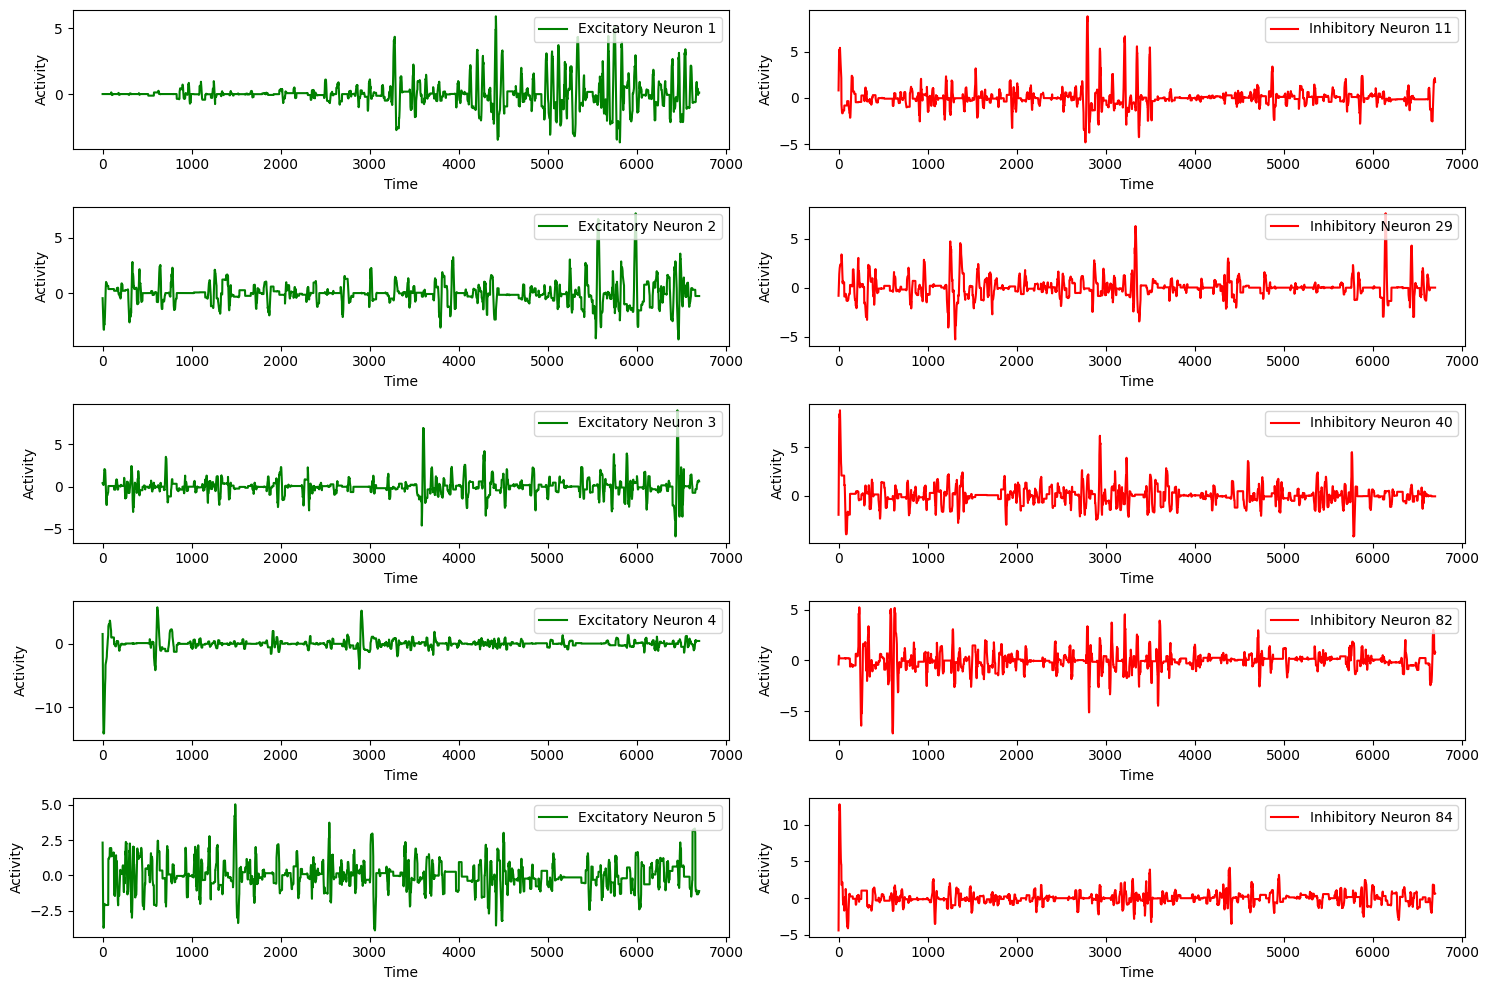

In [17]:
import matplotlib.pyplot as plt


# Extract indices for green and red neurons
green_idx = data['green_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary
red_idx = data['red_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary

# Explicitly select the first 5 indices for excitatory (green) and inhibitory (red) neurons
selected_green_idx = green_idx[:5]  # Selecting first 5 excitatory neurons
selected_red_idx = red_idx[:5]  # Selecting first 5 inhibitory neurons

# Extract time series data for the selected neurons
selected_green_data = dff_filtered[selected_green_idx, :]
selected_red_data = dff_filtered[selected_red_idx, :]

# Plotting
plt.figure(figsize=(15, 10))

# Plot excitatory neurons
for i, idx in enumerate(selected_green_idx, start=1):
    plt.subplot(5, 2, i*2-1)  # Positioning plots in a 5x2 grid
    plt.plot(selected_green_data[i-1, :], label=f'Excitatory Neuron {idx+1}',color="green")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')
    

# Plot inhibitory neurons
for i, idx in enumerate(selected_red_idx, start=1):
    plt.subplot(5 ,2, i*2)  # Positioning plots in a 5x2 grid
    plt.plot(selected_red_data[i-1, :], label=f'Inhibitory Neuron {idx+1}', color="red")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')

plt.tight_layout()
plt.show()





In [18]:
from scipy.io import loadmat
# Load the MAT file
data_path = 'Data/dataPro.mat'
data_old = loadmat(data_path)

# Explore the keys and structure of the loaded data
data_keys = list(data.keys())
data_structure = {key: type(data[key]) for key in data_keys}

# Provide the keys and their data types to understand the structure
data_keys, data_structure

(['__header__',
  '__version__',
  '__globals__',
  'dff_filtered',
  'green_idx',
  'positions',
  'red_idx'],
 {'__header__': bytes,
  '__version__': str,
  '__globals__': list,
  'dff_filtered': numpy.ndarray,
  'green_idx': numpy.ndarray,
  'positions': numpy.ndarray,
  'red_idx': numpy.ndarray})

In [39]:
dff_filtered_old=data_old['dff_filtered']
positions_old = data_old['positions']
print(dff_filtered.shape)

(5766, 6700)


In [40]:
data['positions']=positions_old

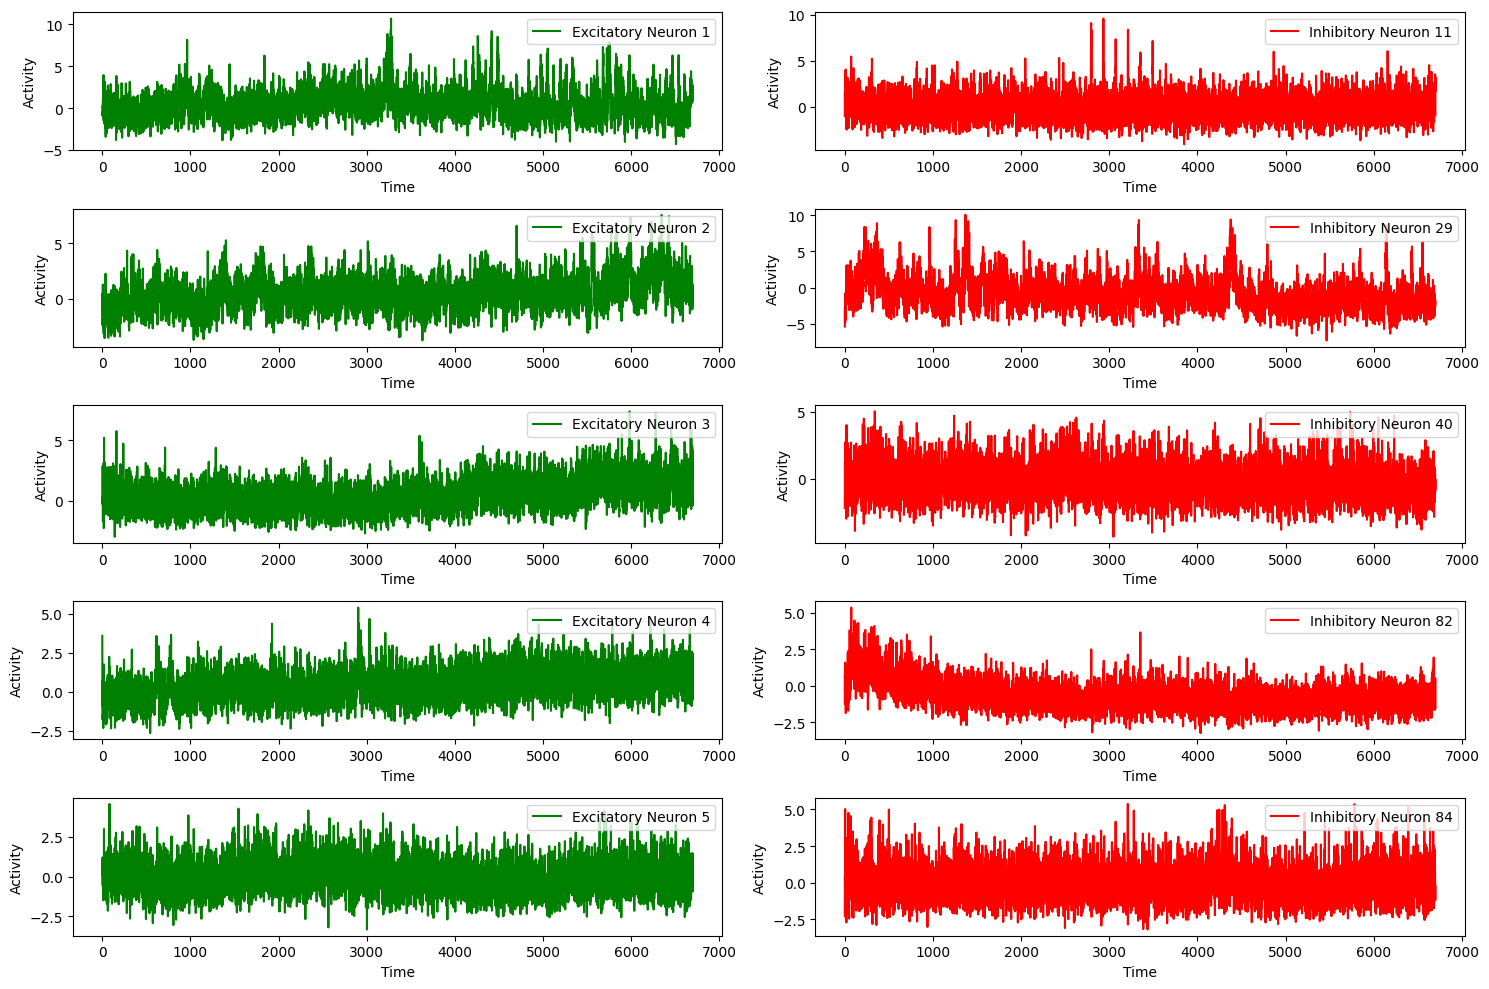

In [20]:
import matplotlib.pyplot as plt


# Extract indices for green and red neurons
green_idx = data_old['green_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary
red_idx = data_old['red_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary

# Explicitly select the first 5 indices for excitatory (green) and inhibitory (red) neurons
selected_green_idx = green_idx[:5]  # Selecting first 5 excitatory neurons
selected_red_idx = red_idx[:5]  # Selecting first 5 inhibitory neurons

# Extract time series data for the selected neurons
selected_green_data = dff_filtered_old[selected_green_idx, :]
selected_red_data = dff_filtered_old[selected_red_idx, :]

# Plotting
plt.figure(figsize=(15, 10))

# Plot excitatory neurons
for i, idx in enumerate(selected_green_idx, start=1):
    plt.subplot(5, 2, i*2-1)  # Positioning plots in a 5x2 grid
    plt.plot(selected_green_data[i-1, :], label=f'Excitatory Neuron {idx+1}',color="green")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')
    

# Plot inhibitory neurons
for i, idx in enumerate(selected_red_idx, start=1):
    plt.subplot(5 ,2, i*2)  # Positioning plots in a 5x2 grid
    plt.plot(selected_red_data[i-1, :], label=f'Inhibitory Neuron {idx+1}', color="red")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')

plt.tight_layout()
plt.show()


## PCA

In [36]:
from sklearn.decomposition import PCA

# Apply PCA, keeping the first 2 principal components for visualization
pca = PCA(n_components=5)
pca_result = pca.fit_transform(dff_filtered)

# Calculate the explained variance ratio of the first two components
explained_variance_ratio = pca.explained_variance_ratio_

pca_result, explained_variance_ratio

(array([[ 2.22632631e+00,  3.79975036e+00,  3.04631474e+01,
          8.94251712e+00, -1.01666526e+01],
        [ 2.12639885e+01,  1.37395582e+01, -1.44858080e+01,
         -1.06011874e+01,  6.51187334e+00],
        [ 1.94090416e+00, -2.32220059e+01,  1.04590463e+01,
          2.03455673e-01, -4.66386462e+00],
        ...,
        [-2.73237650e+01, -4.67358707e+01,  5.58176258e+00,
         -4.90696001e+00, -1.15778730e+01],
        [-2.88398217e+01, -1.85831292e-02, -1.75841119e+00,
         -1.12730616e+00, -3.94064156e+00],
        [-1.53705466e+01,  1.84409332e+00, -1.48118621e+00,
         -6.10243420e+00, -8.89573609e+00]]),
 array([0.08157675, 0.04629383, 0.02209775, 0.01721756, 0.01349929]))

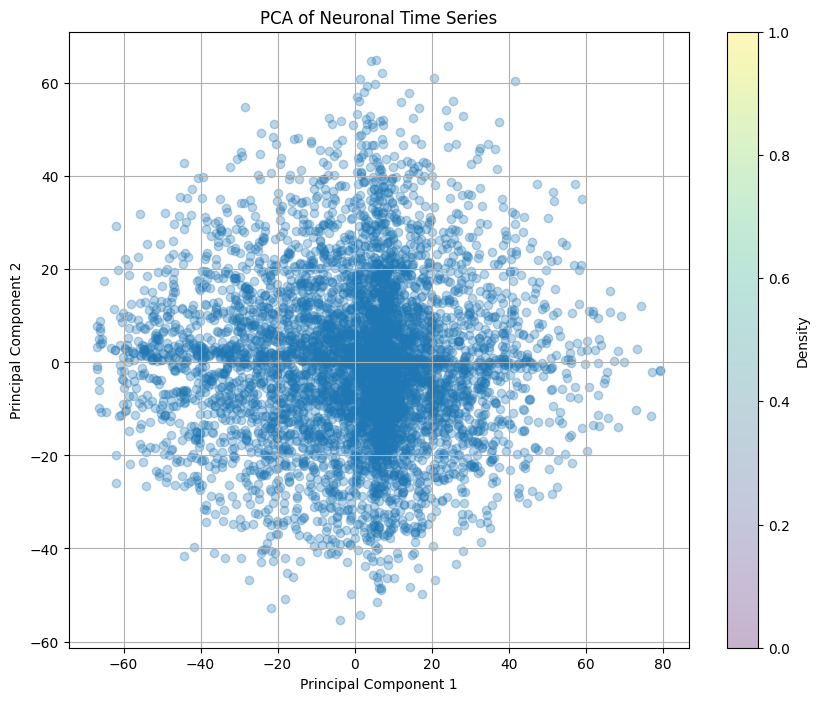

In [44]:
import matplotlib.pyplot as plt

# Plotting the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.3)
plt.title('PCA of Neuronal Time Series')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Density', alpha=0.5)
plt.grid(True)

# Show the plot
plt.show()


## Heat map

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

activity_data = np.array(dff_scaled)

# Now, create the heatmap
plt.figure(figsize=(20, 10))  # Adjust the size as needed
sns.heatmap(activity_data, cmap='RdBu_r', vmin=-3, vmax=3, xticklabels=1000, yticklabels=1000, cbar_kws={'label': 'Activity Level'})
plt.title('Neuron Activity Over Time')
plt.xlabel('Time Step')
plt.ylabel('Neuron')
plt.show()


NameError: name 'dff_scaled' is not defined

In [21]:

selected_green_data = dff_filtered[green_idx, :]
selected_red_data = dff_filtered[red_idx, :]

In [20]:

activity_data = np.array(selected_green_data)
# Now, create the heatmap
plt.figure(figsize=(20, 10))  # Adjust the size as needed
sns.heatmap(activity_data, cmap='RdBu_r', vmin=-5, vmax=5, xticklabels=1000, yticklabels=1000, cbar_kws={'label': 'Activity Level'})
plt.title('Neuron Activity Over Time')
plt.xlabel('Time Step')
plt.ylabel('Neuron')
plt.show()

NameError: name 'sns' is not defined

<Figure size 2000x1000 with 0 Axes>